In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_feature_selection_NEW.csv to cleaned_data_feature_selection_NEW.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data_feature_selection_NEW.csv']))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Prepare the data
X = df.drop(['CLASS', 'Unnamed: 0'], axis=1)  # Adjust based on your dataset's column names
y = df['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
parameters = {'n_estimators':(300, 400, 500, 600),
              'max_depth':(5, 6, 7, 8, 9),
              'min_samples_split':(2, 3, 4, 5, 6),
              'min_samples_leaf':(2, 3, 4, 5)
              }

gs_rf = GridSearchCV(rf_classifier, parameters)

gs_rf.fit(X_train, y_train_encoded)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': (5, 6, 7, 8, 9),
                         'min_samples_leaf': (2, 3, 4, 5),
                         'min_samples_split': (2, 3, 4, 5, 6),
                         'n_estimators': (300, 400, 500, 600)})

In [ ]:
# Predict and evaluate
y_pred_rf = gs_rf.predict(X_test)
test_accuracy = accuracy_score(y_test_encoded, y_pred_rf)

Accuracy: 0.9761904761904762
Confusion Matrix:


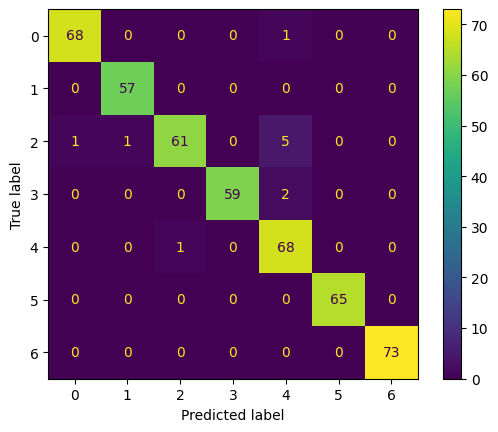

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")

confusion_matrix = confusion_matrix(y_test_encoded, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_rf, average='macro')
print(f'Precision: {precision}')

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_rf, average='macro')
print(f'F1 Score: {f1}')

Precision: 0.9781248109876665
F1 Score: 0.9766482143543612
